<p style="text-align: center;">
    <h1> Medical Cost Prediction Using Linear Regression.</h1>
</p>

-----
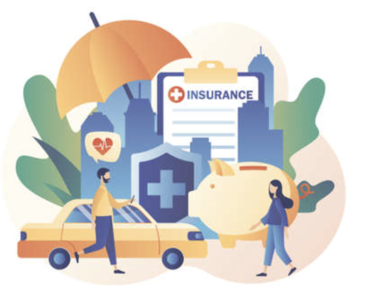


-----

***This project aims to predict medical costs using linear regression.*** 

**A linear regression model** is used to analyze the relationship between medical costs (dependent variable) and various factors (independent variables) that may affect them. 


The aim is to understand how factors like age, gender, BMI, and smoking status influence the amount of money spent on healthcare services for an individual.

***Dataset overview:***

**1- Age:** This column records the age of each individual receiving healthcare services.<br>
It helps to understand how age influences medical costs.

**2- Sex:** This column indicates the gender of each individual, allowing for analysis of any gender-based differences in medical costs.

**3- BMI (Body Mass Index):** This column measures the body fat of each individual based on their weight and height.<br> It provides insight into how BMI relates to healthcare costs.

**4- Smoking :** This column categorizes individuals as either smokers or non-smokers.<br> It helps to examine the impact of smoking on medical expenses.

**5- Region:** This column identifies the geographical region where each individual resides.<br> It enables the exploration of regional variations in healthcare costs.

**6- Children:** This column indicates the number of dependent children for each individual.<br> It allows for investigation of how family size relates to medical expenses.

**7- charges:** This column represents the dependent variable of interest, recording the amount of money spent on healthcare services for each individual. <br>
It serves as the target variable to be predicted using the other independent variables mentioned above.

### Importing dependencies

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import squarify as sq
import plotly.express as px
import missingno as msno
import random
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

### Loading data

In [18]:
df=pd.read_csv('/Users/nada/Downloads/insurance.csv')

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Exploratory Data Analysis (EDA)

In [21]:
print('Number of rows:', df.shape[0]," ",'Number of columns:', df.shape[1]) 

Number of rows: 1338   Number of columns: 7


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
cat_cols = df.select_dtypes(include=['object']).columns 
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
pprint(cat_cols)
print("Numerical Variables:")
pprint(num_cols)

Categorical Variables:
Index(['sex', 'smoker', 'region'], dtype='object')
Numerical Variables:
['age', 'bmi', 'children', 'charges']


In [23]:
print("Number of unique values per column:")
print(df.nunique())

Number of unique values per column:
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [22]:
print("Count of non-null values per column:")
print(df.count())

Count of non-null values per column:
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [91]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 800x600 with 0 Axes>

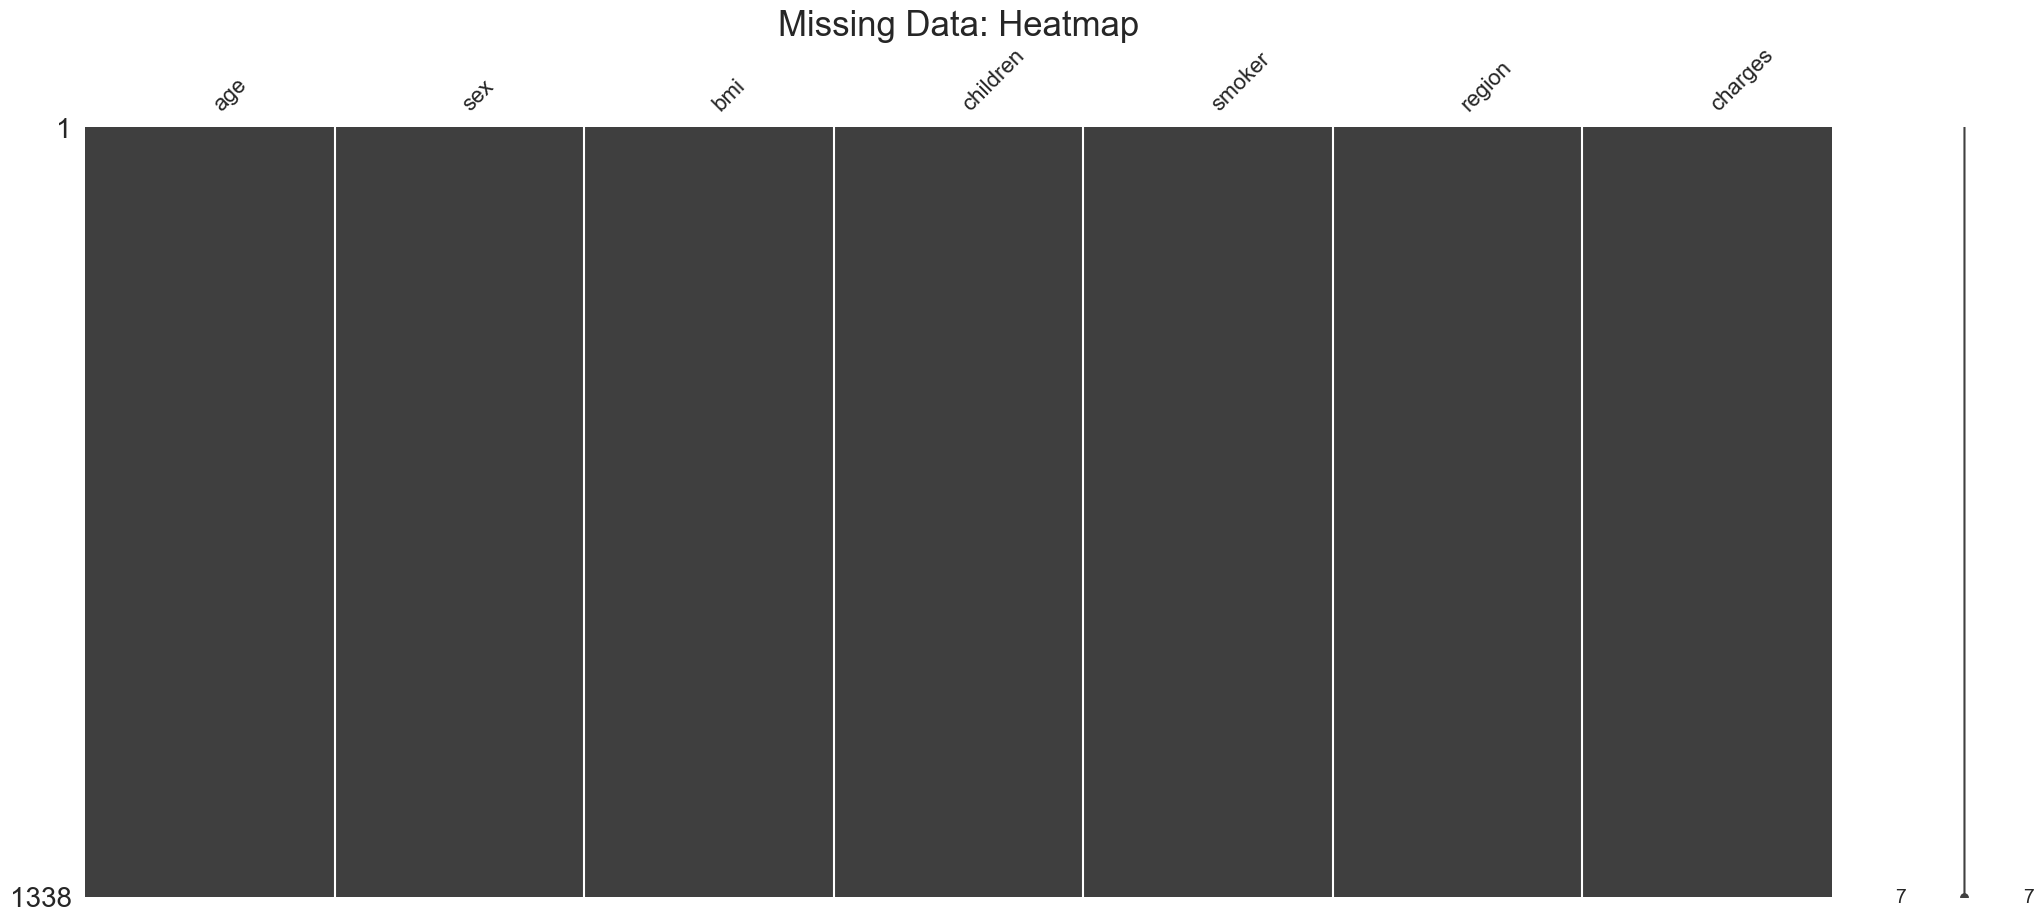

In [182]:
plt.figure(figsize=(8, 6))
msno.matrix(df)
plt.title("Missing Data: Heatmap", fontsize=25)
plt.show()

- There is no missing value in the dataset

In [197]:
df.duplicated().sum()

1

- There is one duplicated row in the dataset

In [29]:
df[num_cols].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [28]:
df[cat_cols].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


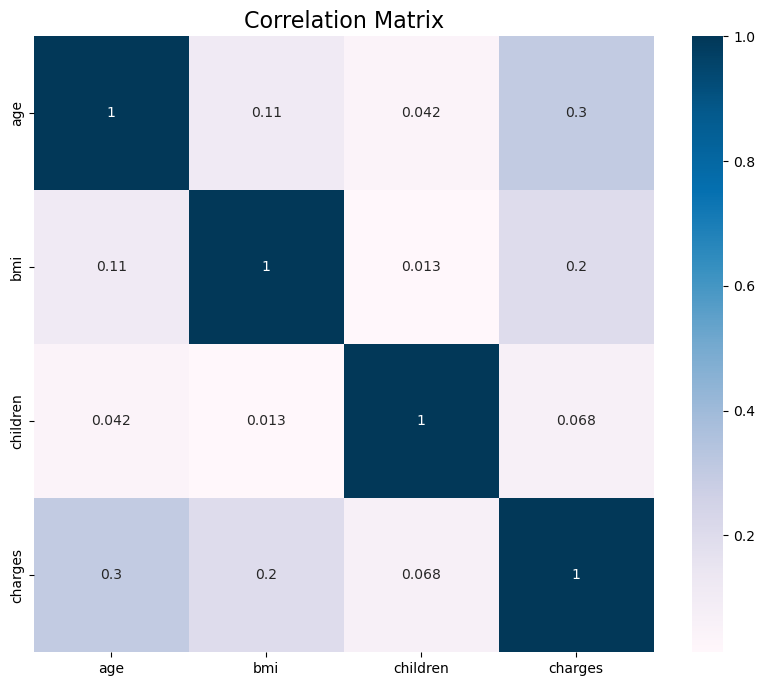

In [43]:
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='PuBu', annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

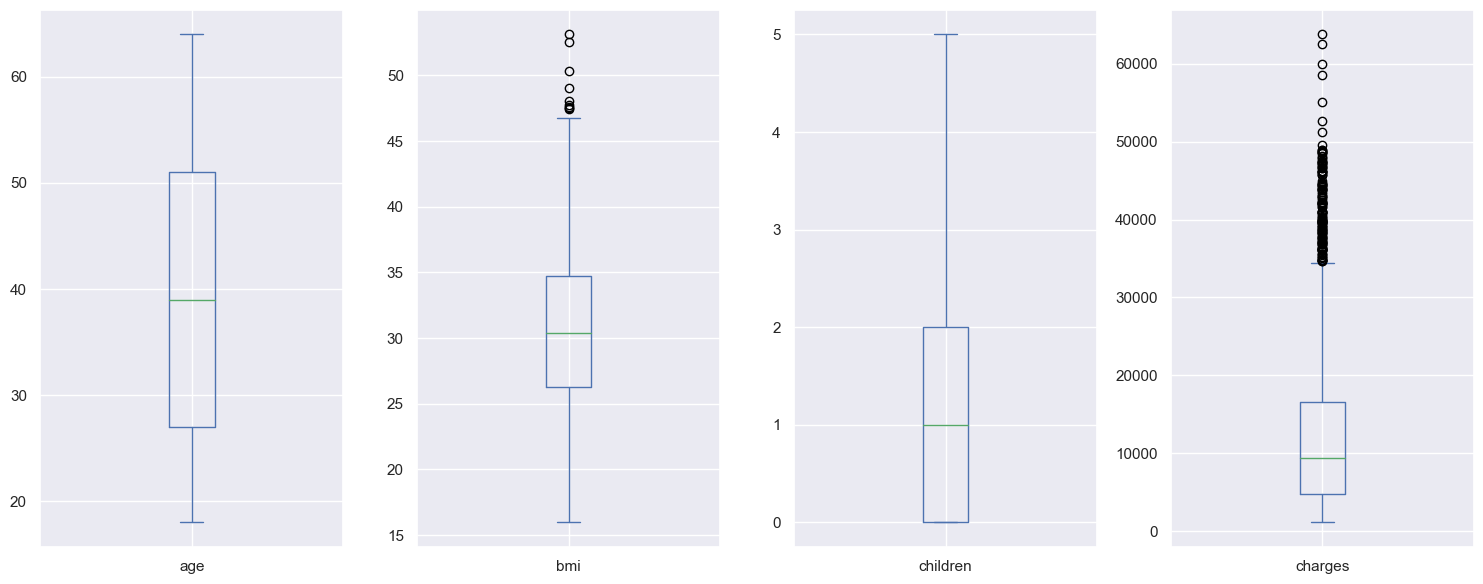

In [207]:
df.plot( kind="box", subplots=True, figsize=(15, 6))
plt.tight_layout();

-----

#### Visualize the distribution of each column

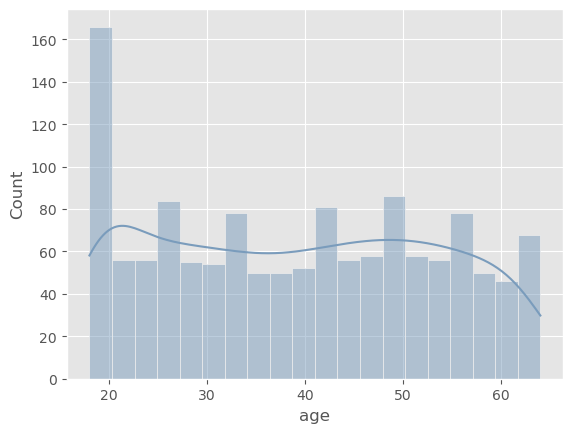

In [106]:
#age column
sns.histplot(data=df, x='age', kde=True, bins=20, color='#7a9cbc')
plt.show()

In [86]:
#sex column
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

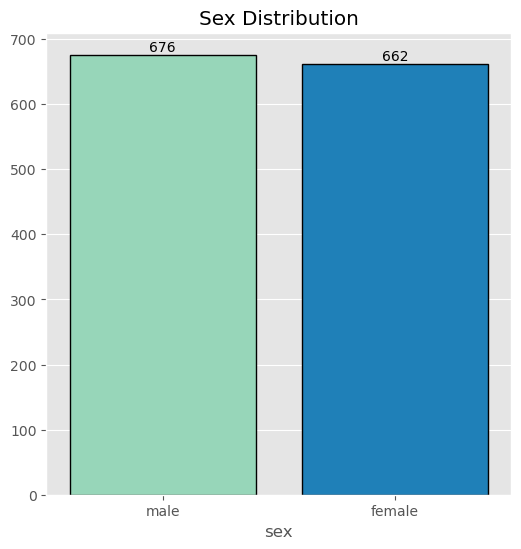

In [113]:
c = df['sex'].value_counts()
# visualizing our target distribution

plt.figure(figsize=(6, 6))
ax= sns.barplot(x=c.index, y=c.values,
            saturation=1, edgecolor='k',
            linewidth=1, palette='YlGnBu')
plt.title(f'Sex Distribution')
ax.bar_label(ax.containers[0])
plt.show()

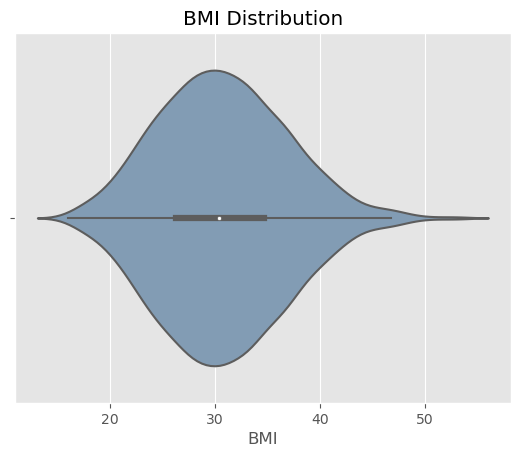

In [116]:
#BMI (Body Mass Index) column
sns.violinplot(x=df['bmi'], color='#7a9cbc')
plt.xlabel('BMI')
plt.title('BMI Distribution')
plt.show()

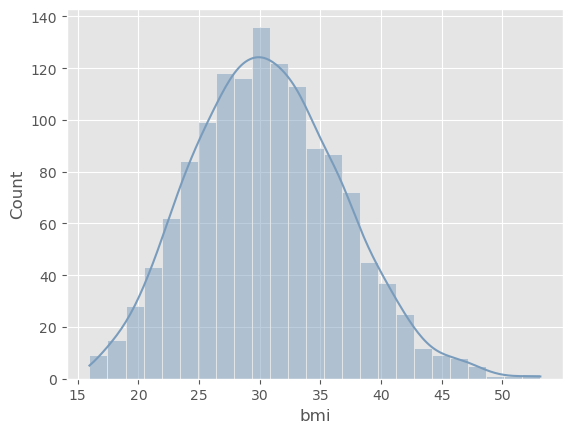

In [120]:
sns.histplot(data=df, x='bmi', kde=True, color='#7a9cbc')
plt.show()

- The bmi column is normally distributed

In [90]:
#children column
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

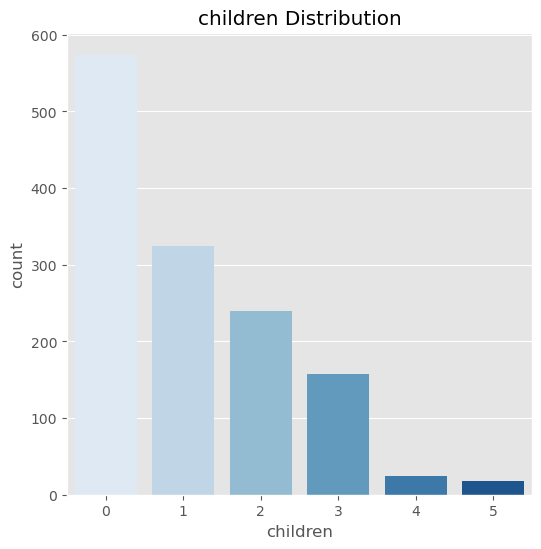

In [91]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df, palette='Blues')
plt.title('children Distribution')
plt.show()

In [92]:
#Smoker column
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

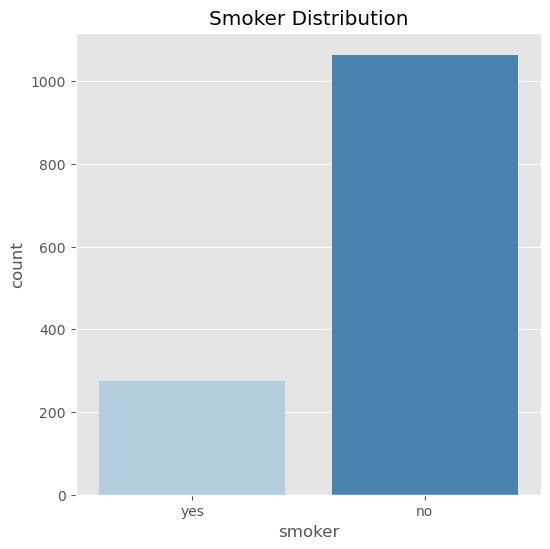

In [93]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df, palette='Blues')
plt.title('Smoker Distribution')
plt.show()

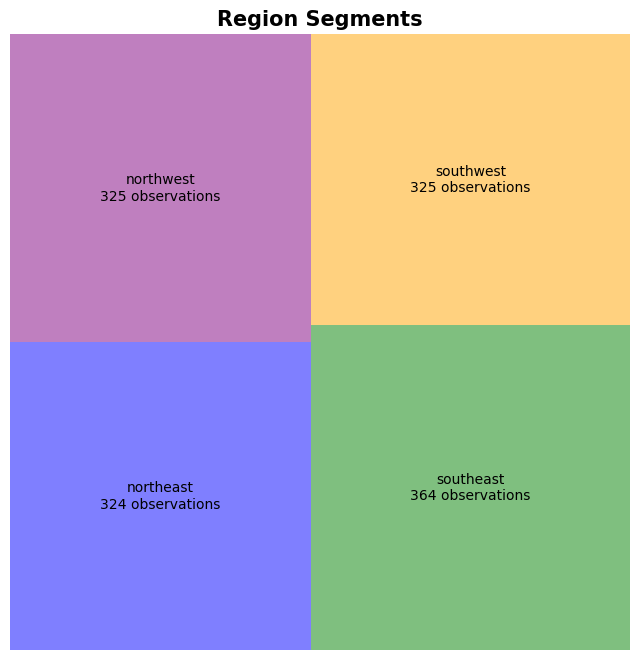

In [95]:
#region column
sizes = [324, 325, 364, 325]  
labels = ['northeast', 'northwest', 'southeast', 'southwest']  

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(8, 8)

colors_dict = {
    'northeast': 'blue',
    'northwest': 'purple',
    'southeast': 'green',
    'southwest': 'orange'
}
sq.plot(
    sizes=sizes,
    label=[f'{label}\n{size} observations' for label, size in zip(labels, sizes)],
    color=[colors_dict[label] for label in labels],
    alpha=0.5
)

plt.title("Region Segments", fontsize=15, fontweight="bold")
plt.axis('off')

plt.show()

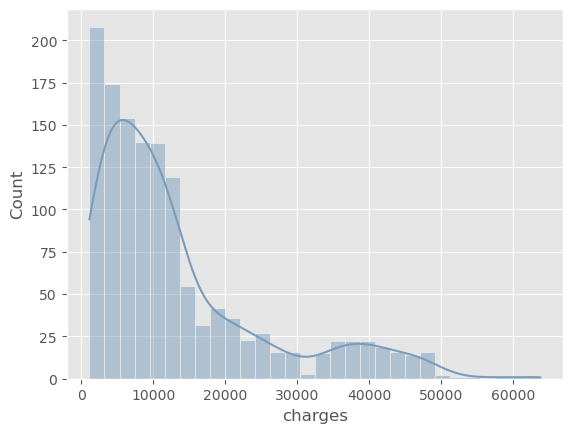

In [121]:
#charges column
sns.histplot(data=df, x='charges', kde=True, color='#7a9cbc')
plt.show()

----

In [39]:
# Group the data by Age and calculate the average medical cost for each age group
age_grouped = df.groupby('age')['charges'].mean()

print("Insights by grouping the data based on Age:")
for age, avg_cost in age_grouped.items():
    print(f"For patients in the age {age}, the average medical cost is {avg_cost:.2f}")

Insights by grouping the data based on Age:
For patients in the age 18, the average medical cost is 7086.22
For patients in the age 19, the average medical cost is 9747.91
For patients in the age 20, the average medical cost is 10159.70
For patients in the age 21, the average medical cost is 4730.46
For patients in the age 22, the average medical cost is 10012.93
For patients in the age 23, the average medical cost is 12419.82
For patients in the age 24, the average medical cost is 10648.02
For patients in the age 25, the average medical cost is 9838.37
For patients in the age 26, the average medical cost is 6133.83
For patients in the age 27, the average medical cost is 12184.70
For patients in the age 28, the average medical cost is 9069.19
For patients in the age 29, the average medical cost is 10430.16
For patients in the age 30, the average medical cost is 12719.11
For patients in the age 31, the average medical cost is 10196.98
For patients in the age 32, the average medical cost

In [41]:
children_grouped = df.groupby('children')['charges'].mean()
children_grouped

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

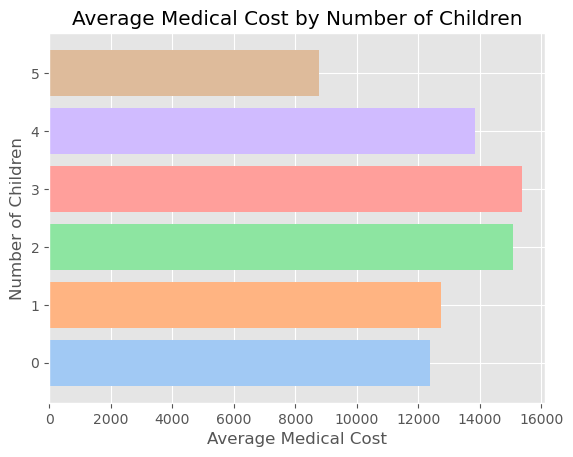

In [52]:
light_palette = sns.color_palette('pastel')
plt.barh(children_grouped.index, children_grouped.values, color=light_palette)
plt.xlabel('Average Medical Cost')
plt.ylabel('Number of Children')
plt.title('Average Medical Cost by Number of Children')
plt.show()

In [57]:
min_charge = df['charges'].min()
max_charge = df['charges'].max()
print("Minimum charge: ", min_charge)
print("Maximum charge: ", max_charge)

Minimum charge:  1121.8739
Maximum charge:  63770.42801


In [58]:
start_value = 1121.8739
end_value = 63770.42801
num_values = 5
values = np.linspace(start_value, end_value, num_values)
print("Five values that span the range:")
for value in values:
    print(value)

Five values that span the range:
1121.8739
16784.0124275
32446.150955
48108.289482500004
63770.42801


In [61]:
bin_edges = [1121.8739, 16784.0124275, 32446.150955, 48108.289482500004, 63770.42801]
charges_grouped = df.groupby(pd.cut(df['charges'], bins=bin_edges)).size()
print("Insights by grouping the data based on Medical Costs:")
for range_, count in charges_grouped.items():
    print(f"Number of individuals with medical costs in the range {range_}: {count}")

Insights by grouping the data based on Medical Costs:
Number of individuals with medical costs in the range (1121.874, 16784.012]: 1004
Number of individuals with medical costs in the range (16784.012, 32446.151]: 179
Number of individuals with medical costs in the range (32446.151, 48108.289]: 138
Number of individuals with medical costs in the range (48108.289, 63770.428]: 16


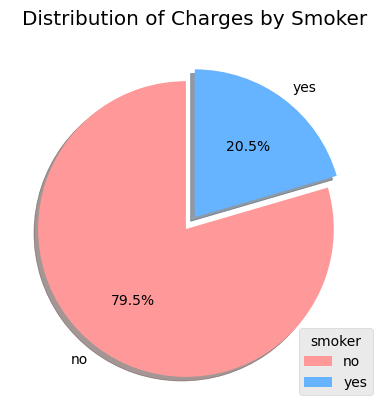

In [70]:
smoker_counts = df.groupby(['smoker'])['charges'].count()
colors = ['#ff9999', '#66b3ff']
explode = [0.1, 0] 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', shadow=True, startangle=90,explode=explode, colors=colors)
plt.title('Distribution of Charges by Smoker')
plt.legend(title='smoker', loc='lower right')
plt.show()

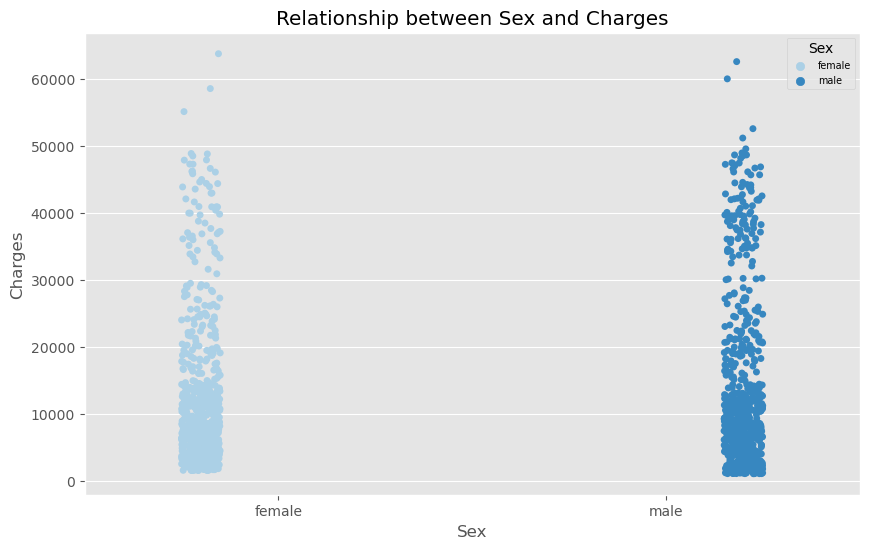

In [122]:
plt.figure(figsize=(10, 6))
sns.stripplot(x="sex", y="charges", hue="sex", data=df, palette='Blues', dodge=True)
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Relationship between Sex and Charges")
plt.legend(title="Sex", loc="upper right", fontsize="x-small")
plt.show()

In [83]:
df.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [123]:
table = df.groupby('region').size().reset_index(name='count')
table

,region,count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


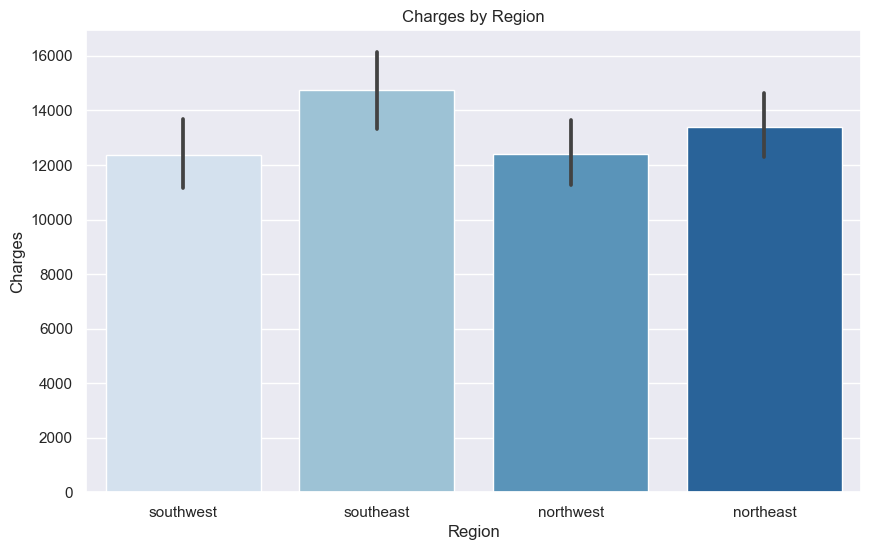

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x="region", y="charges", data=df, palette='Blues')
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Charges by Region")
plt.show()

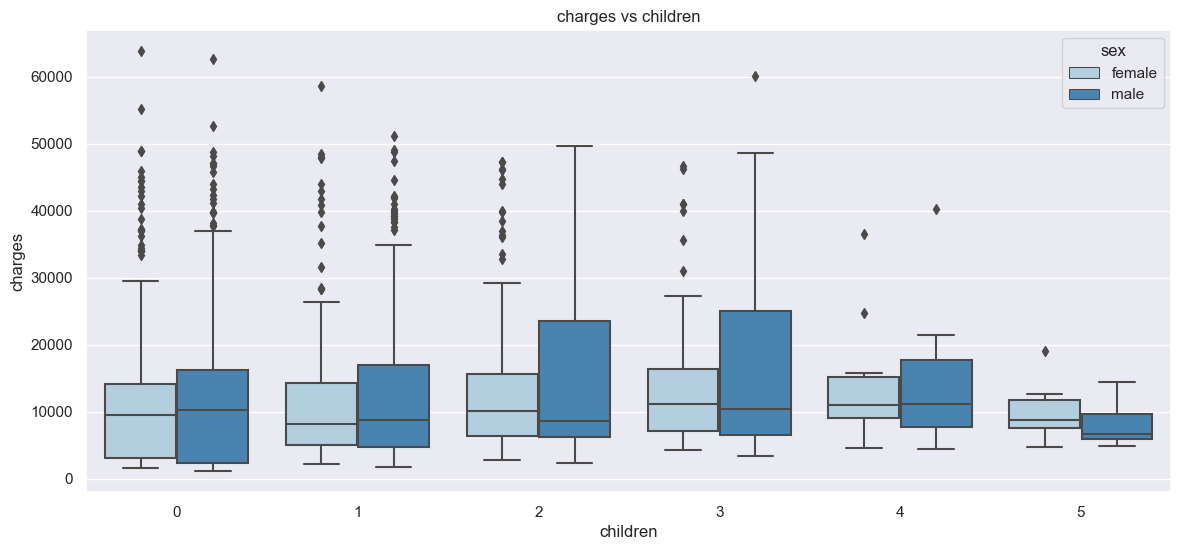

In [164]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='Blues')
plt.title('charges vs children');

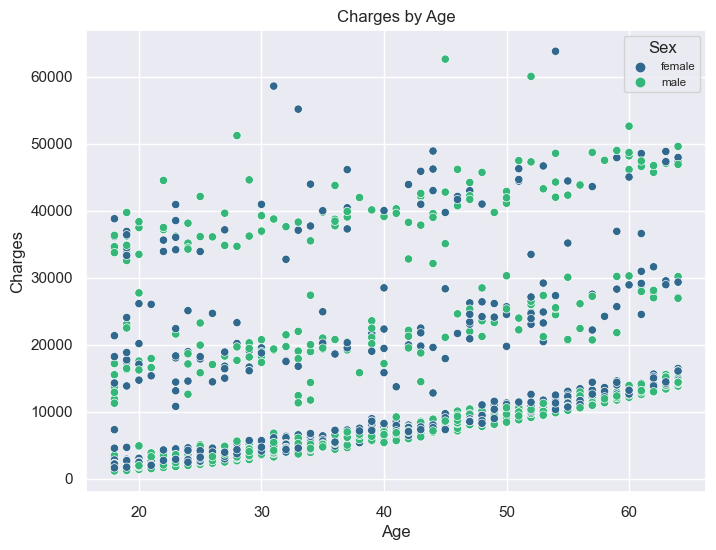

In [173]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="charges", data=df, palette='viridis', hue='sex')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Charges by Age")
plt.legend(title="Sex", loc="upper right", fontsize="x-small")
plt.show()

----

### Data Pre-Processin

In [124]:
print(df.select_dtypes(include='object').columns)

Index(['sex', 'smoker', 'region'], dtype='object')


In [125]:
df.select_dtypes(include='object')

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [126]:
# encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [127]:
# encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [128]:
# encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [129]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [130]:
df['sex'].value_counts()

sex
0    676
1    662
Name: count, dtype: int64

In [131]:
df['smoker'].value_counts()

smoker
1    1064
0     274
Name: count, dtype: int64

In [132]:
df['region'].value_counts()

region
0    364
1    325
3    325
2    324
Name: count, dtype: int64

In [133]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

### Splitting the Data into Train and Test

In [134]:
x = df.drop(columns='charges', axis=1)
y = df['charges']

In [135]:
print("Number of values in X (features):", x.shape[0])
print("Number of values in Y (target variable):", y.shape[0])

Number of values in X (features): 1338
Number of values in Y (target variable): 1338


In [136]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [137]:
print("Number of rows x train:", x_train.shape)
print("Number of rows y train:", y_train.shape)

Number of rows x train: (1070, 6)
Number of rows y train: (1070,)


In [138]:
print("Number of rows x test:", x_test.shape)
print("Number of rows y test:", y_test.shape)

Number of rows x test: (268, 6)
Number of rows y test: (268,)


### Model training

In [139]:
regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

### Model prediction & evaluation 

In [141]:
training_data_prediction= regressor.predict(x_train)

r2_train=metrics.r2_score(y_train, training_data_prediction)
print('R squared value: ', r2_train)

R squared value:  0.751505643411174


In [143]:
test_data_prediction= regressor.predict(x_test)

r2_test=metrics.r2_score(y_test, test_data_prediction)
print('R squared value: ', r2_test)

R squared value:  0.7447273869684077


In [153]:
X_new = pd.DataFrame([[30, 1, 25.5, 0, 1, 3]], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

# Make predictions
y_new_pred = regressor.predict(X_new)

print("Predicted insurance charges:")
print(y_new_pred)

Predicted insurance charges:
[4065.98760721]
